# Practical 8: K-means Clustering
 1.Load a dataset suitable for clustering (e.g., customer segmentation dataset).
 
 2.Implement k-means clustering using scikit-learn.
 
 3.Determine the optimal number of clusters using the elbow method and visualize the clusters.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import skew
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r'C:\Users\197as\OneDrive\Documents\ML_College\Mall_Customers_2.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
missing_values = df.isnull()
print(missing_values)

     CustomerID  Gender    Age  Annual Income (k$)  Spending Score (1-100)
0         False   False  False               False                   False
1         False   False  False               False                   False
2         False   False  False               False                   False
3         False   False  False               False                   False
4         False   False  False               False                   False
..          ...     ...    ...                 ...                     ...
195       False   False  False               False                   False
196       False   False  False               False                   False
197       False   False  False               False                   False
198       False   False  False               False                   False
199       False   False  False               False                   False

[200 rows x 5 columns]


In [4]:
missing_value = df.isnull().sum()
print(missing_value)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


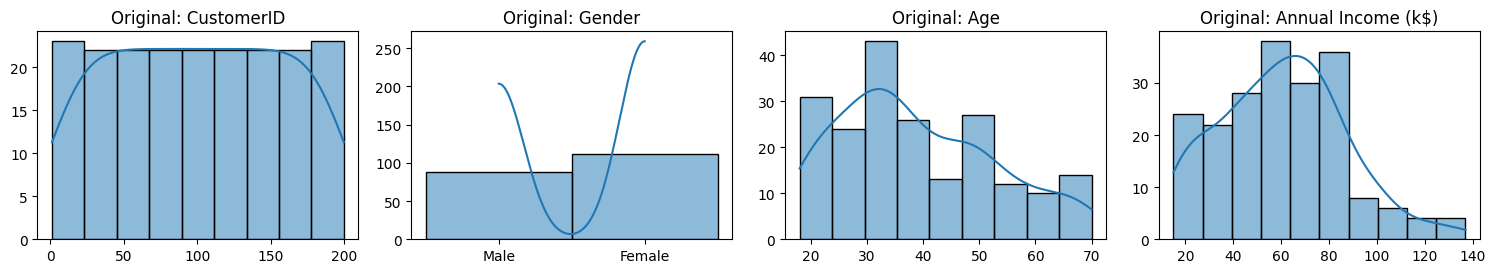

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i + 1)  
    sns.histplot(df[column], kde=True)
    plt.title(f'Original: {column}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [6]:
for column in df.columns:
    if df[column].dtype != 'object': 
        column_skewness = skew(df[column].dropna())
        print(f'{column}: Skewness = {column_skewness}')

CustomerID: Skewness = 0.0
Age: Skewness = 0.48191947090957177
Annual Income (k$): Skewness = 0.319423684276314
Spending Score (1-100): Skewness = -0.04686530945553505


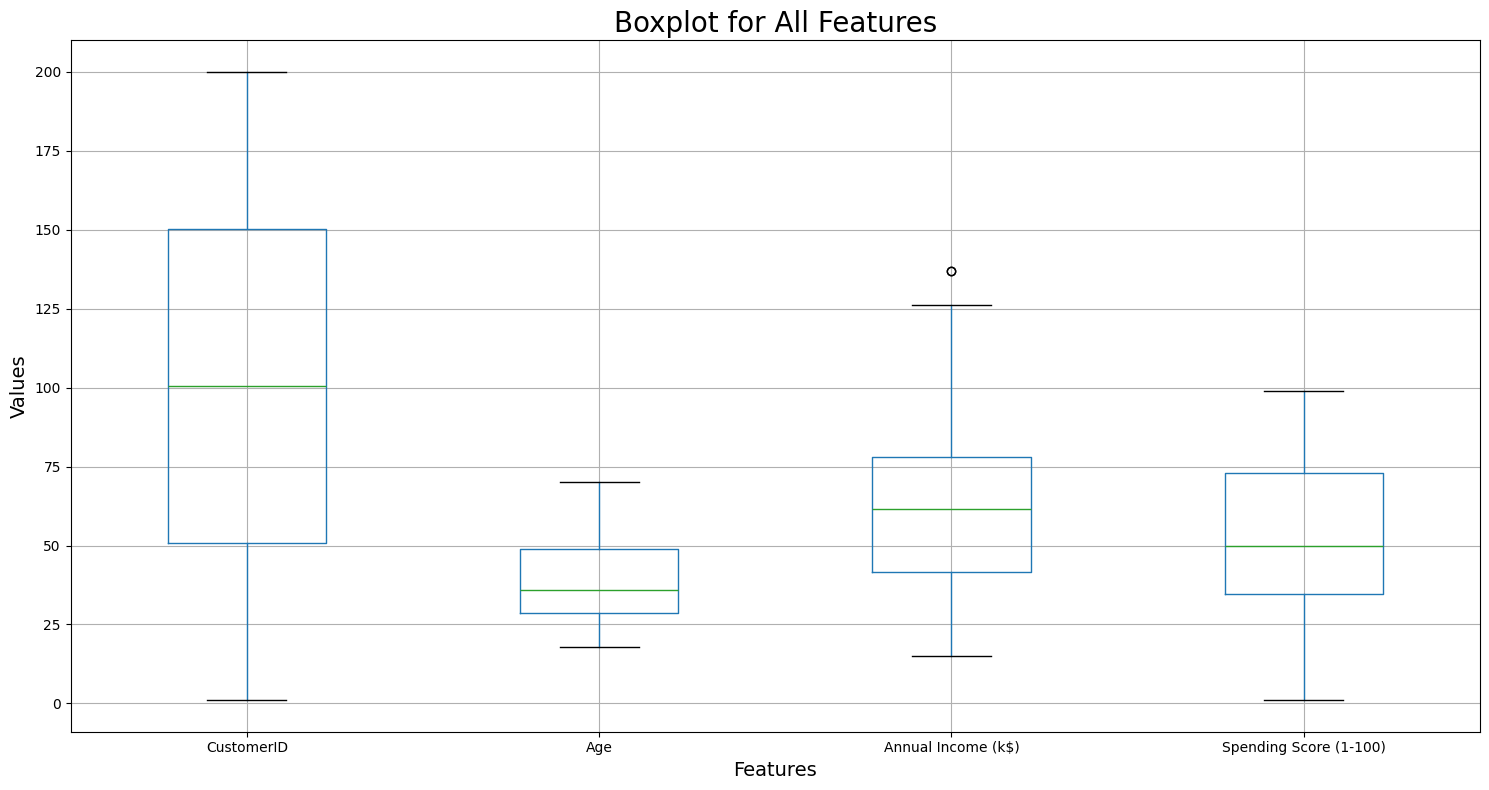

In [7]:
plt.figure(figsize=(15, 8))  
df.boxplot()  
plt.title("Boxplot for All Features", fontsize=20)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.tight_layout()  
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
print(df['Gender'].value_counts())


Gender
0    112
1     88
Name: count, dtype: int64


In [9]:
skewness_threshold = 0.5  

df_cleaned = df.copy()
for column in df.select_dtypes(include=[np.number]).columns:
    skewness = df[column].skew()
    print(f"Feature: {column}, Skewness: {skewness}")
    
    if abs(skewness) > skewness_threshold:  
        print(f"Feature '{column}' is skewed. Applying IQR for outlier removal.")
        
      
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    else:
        print(f"Feature '{column}' is not skewed. Applying Z-score for outlier removal.")
        z_scores = zscore(df_cleaned[column])
        df_cleaned = df_cleaned[(np.abs(z_scores) < 3)]  

print("Cleaned Dataset:")
print(df_cleaned)


Feature: CustomerID, Skewness: 0.0
Feature 'CustomerID' is not skewed. Applying Z-score for outlier removal.
Feature: Gender, Skewness: 0.24357754003130924
Feature 'Gender' is not skewed. Applying Z-score for outlier removal.
Feature: Age, Skewness: 0.48556885096681657
Feature 'Age' is not skewed. Applying Z-score for outlier removal.
Feature: Annual Income (k$), Skewness: 0.3218425498619055
Feature 'Annual Income (k$)' is not skewed. Applying Z-score for outlier removal.
Feature: Spending Score (1-100), Skewness: -0.047220201374263374
Feature 'Spending Score (1-100)' is not skewed. Applying Z-score for outlier removal.
Cleaned Dataset:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16               

In [10]:
scaler = StandardScaler()
df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)


In [11]:
inertia = [] #SSE
cluster_center=[]
no_iter=[]

K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cleaned)
    inertia.append(kmeans.inertia_)
    cluster_center.append(kmeans.cluster_centers_)
    no_iter.append(kmeans.n_iter_)

In [12]:
print("Inertia:",inertia)
print("Cluster_Center:",cluster_center)
print("No. of Iterations:", no_iter)

Inertia: [1000.0, 715.2750473761118, 574.6285781223221, 519.1132528974904, 404.64818327643644, 354.3966472458642, 294.8058476285871, 254.41521729352561, 227.84632836946236, 190.34252178715482]
Cluster_Center: [array([[-1.33226763e-17,  3.10862447e-17, -1.60427227e-16,
        -4.04121181e-16, -5.77315973e-17]]), array([[-0.81102231, -0.04220977,  0.24178539, -0.75495496, -0.00924323],
       [ 0.89639308,  0.04665291, -0.26723649,  0.8344239 ,  0.0102162 ]]), array([[-0.47192101,  0.04093069,  1.13852727, -0.42245682, -0.37379617],
       [ 0.96109881,  0.07402327, -0.32136456,  0.89868589,  0.07258729],
       [-1.03771518, -0.175385  , -0.86450717, -0.99357269,  0.33934611]]), array([[-0.23613921,  0.63570478,  1.34084099, -0.21476665, -0.42186096],
       [ 0.87831585, -0.52558901, -0.25487886,  0.82006164, -0.19839556],
       [-1.09926874, -0.46960028, -0.38890122, -1.05194947,  0.11807109],
       [ 0.51788967,  1.12815215, -0.69015633,  0.52444796,  0.84760408]]), array([[-0.565

In [13]:
kmeans.labels_[:7]

array([4, 4, 5, 2, 5, 2, 5])

# Choosing the Appropriate Number of Clusters
### Two methods that are commonly used to evaluate the appropriate number of clusters:

 1. The elbow method
    
 2. The silhouette coefficient

These are often used as complementary evaluation techniques rather than one being preferred over the other. 

To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

# 1. The elbow method

When we plot SSE as a function of the number of clusters, SSE continues to decrease as we increase k. 

As more centroids are added, the distance from each point to its closest centroid will decrease.

Spot where the SSE curve starts to bend known as the elbow point. 

The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. 

In given below example, the elbow is located at x=3:


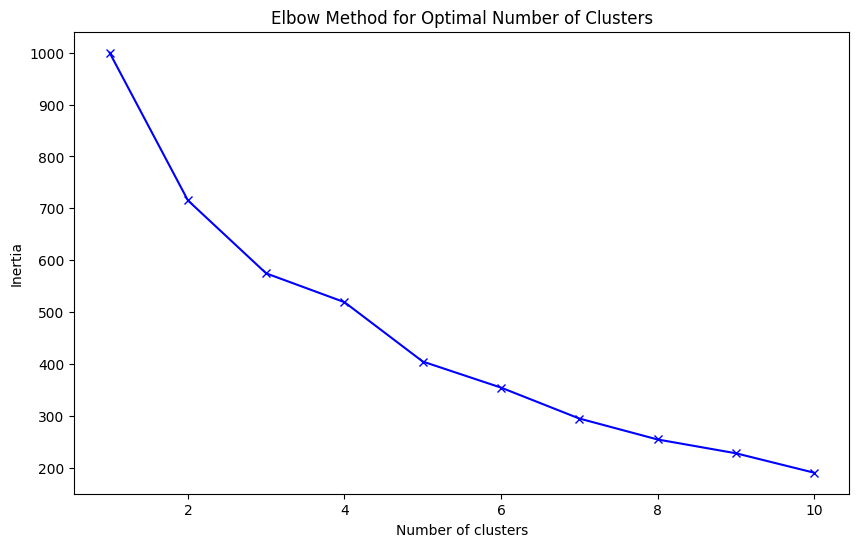

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [15]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
kl.elbow

5

In [16]:
df_cleaned['Cluster'] = kmeans.labels_

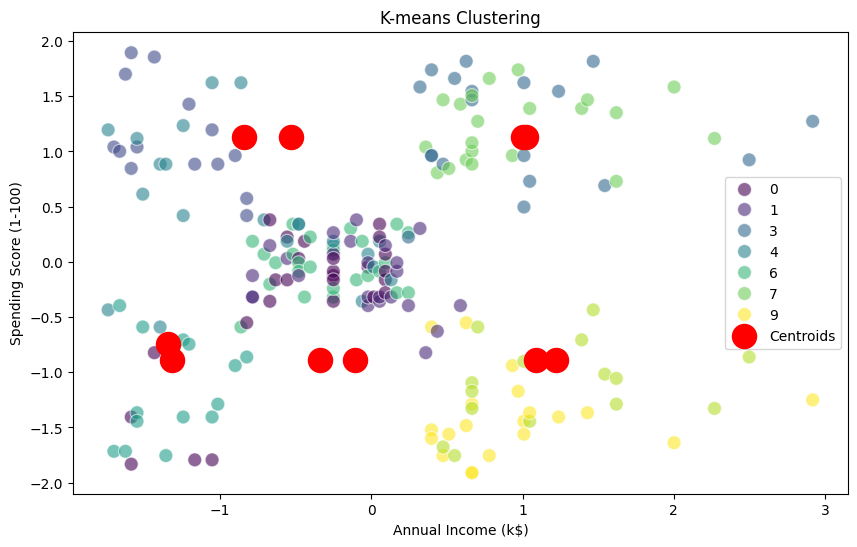

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=df_cleaned, s=100, alpha=0.6, edgecolor='w')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 2. Silhouette Score

The silhouette coefficient is a measure of cluster cohesion and separation. 

It quantifies how well a data point fits into its assigned cluster based on two factors:

 1. How close the data point is to other points in the cluster
 2. How far away the data point is from points in other clusters
 
Silhouette coefficient values range between -1 and 1. 

Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. 

The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

In [18]:
kmeans_kwargs = {"init": "random",
                 "n_init": 10,
                 "max_iter": 300,
                 "random_state": 42, }

In [19]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_cleaned)
    score = silhouette_score(df_cleaned, kmeans.labels_)
    silhouette_coefficients.append(score)

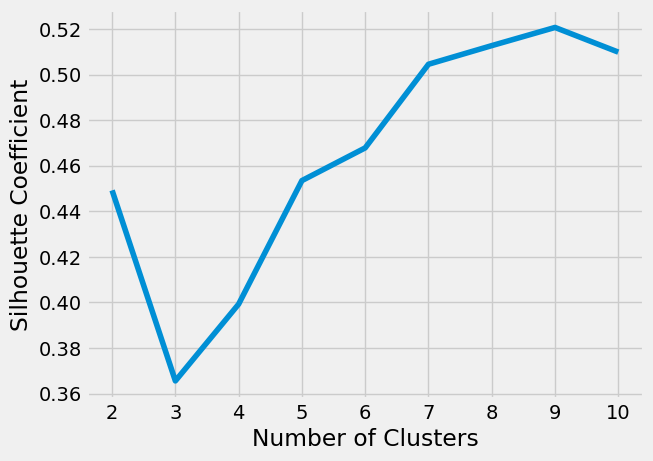

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


### Decision on the number of clusters to use should be guided by a combination of domain knowledge and clustering evaluation metrics.

In [21]:
# Implement k-means clustering with the optimal number of clusters 
#(determined from the elbow method)

optimal_clusters = 3 # From the elbow method, suppose the optimal number of clusters is 5

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

y_kmeans = kmeans.fit_predict(df_cleaned)

In [22]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [23]:
# Add the cluster labels to the DataFrame

df['Cluster'] = y_kmeans

In [24]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,1
197,198,1,32,126,74,2
198,199,1,32,137,18,1
